In [1]:
import matplotlib.pyplot as plt

from FinanceData import get_finance_data

In [2]:
colors = [
    "#ef4444",  # 0
    "#f97316",  # 1
    "#f59e0b",  # 2
    "#eab308",  # 3
    "#84cc16",  # 4
    "#22c55e",  # 5
    "#10b981",  # 6
    "#14b8a6",  # 7
    "#06b6d4",  # 8
    "#0ea5e9",  # 9
    "#3b82f6",  # 10
    "#6366f1",  # 11
    "#8b5cf6",  # 12
    "#a855f7",  # 13
    "#d946ef",  # 14
    "#ec4899",  # 15
    "#f43f5e",  # 16
    "#f3f4f6",  # 17
    "#d1d5db",  # 18
    "#6b7280",  # 19
    "#374151",  # 20
    "#111827",  # 21
]


def rgb_to_float(rgb):
    r = int(rgb[1:3], 16) / 255.0
    g = int(rgb[3:5], 16) / 255.0
    b = int(rgb[5:7], 16) / 255.0

    return (r, g, b)


color_pal = list(map(rgb_to_float, colors))


In [3]:
df = get_finance_data("ks11")
df.drop("Date", inplace=True, axis=1)

df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-09,2408.540039,2429.649902,2403.639893,2424.409912,2424.409912,680500.0
2022-11-10,2405.770020,2426.100098,2401.989990,2402.229980,2402.229980,899000.0
2022-11-11,2466.899902,2486.459961,2463.510010,2483.159912,2483.159912,758000.0
2022-11-14,2485.179932,2499.429932,2470.600098,2474.649902,2474.649902,730900.0
2022-11-16,2487.000000,2487.000000,2446.790039,2477.449951,2477.449951,657600.0


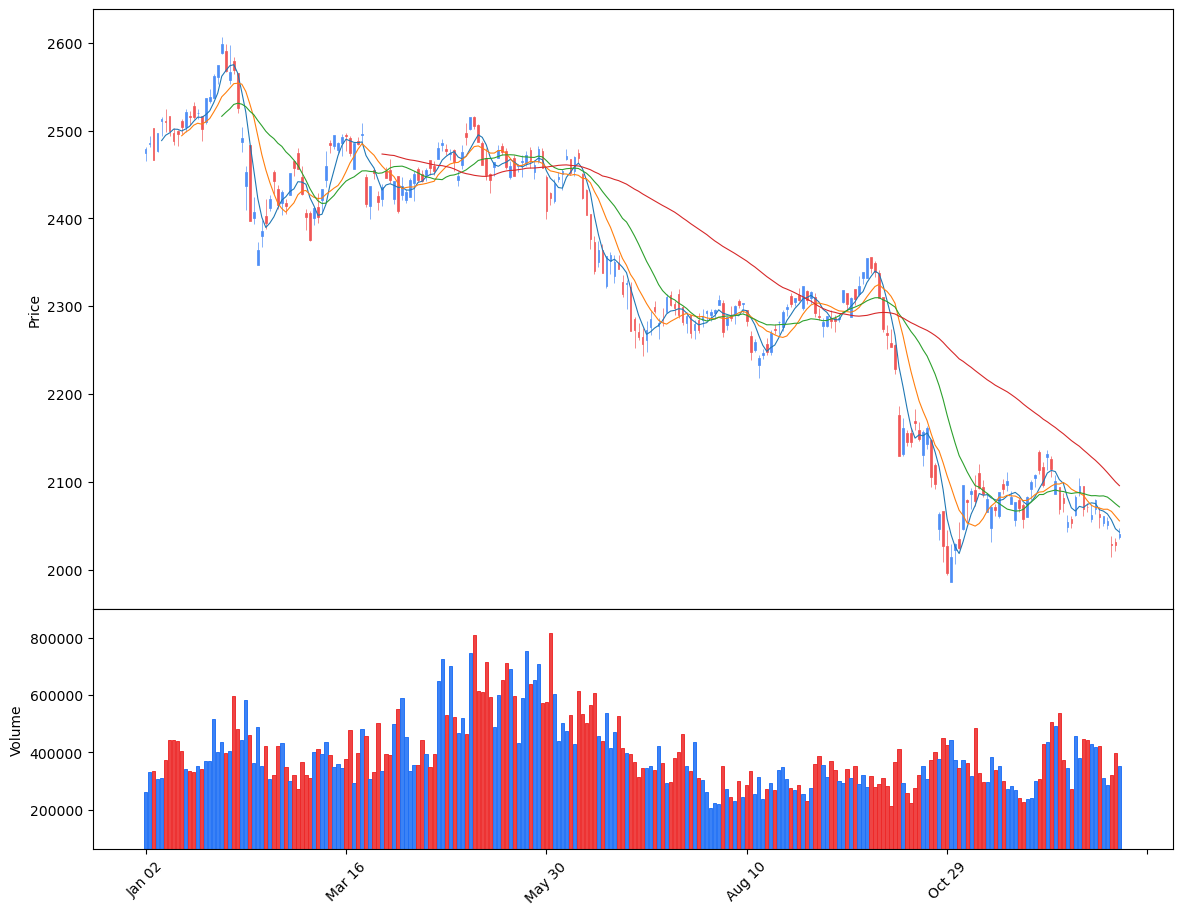

In [4]:
import mplfinance as mpf

one_year_df = df.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-30")]

mpf_mc = mpf.make_marketcolors(
    up=colors[10],
    down=colors[0],
    inherit=True
)

mpf_style = mpf.make_mpf_style(marketcolors=mpf_mc)

mpf.plot(one_year_df, type="candle", style=mpf_style, mav=(5, 10, 20, 60), volume=True, figsize=(15, 12))

In [5]:
df = df.drop(columns=["Open", "High", "Low", "Adj Close"])

In [6]:
df["EMA_9"] = df["Close"].ewm(9).mean().shift()
df["SMA_5"] = df["Close"].rolling(5).mean().shift()
df["SMA_10"] = df["Close"].rolling(10).mean().shift()
df["SMA_15"] = df["Close"].rolling(15).mean().shift()
df["SMA_20"] = df["Close"].rolling(20).mean().shift()
df["SMA_60"] = df["Close"].rolling(60).mean().shift()

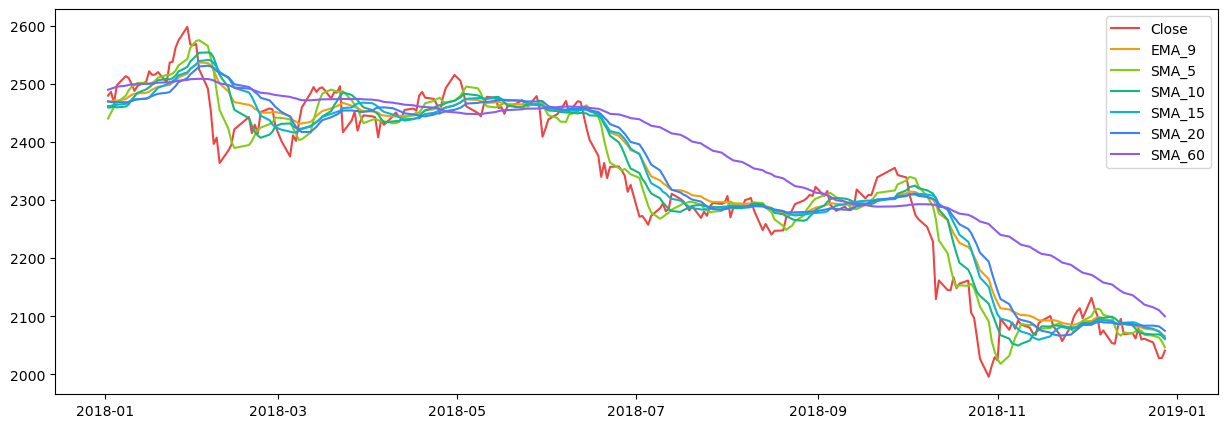

In [7]:
one_year_df = df.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]

plt.plot(one_year_df["Close"], color=color_pal[0], label="Close")
plt.plot(one_year_df["EMA_9"], color=color_pal[2], label="EMA_9")
plt.plot(one_year_df["SMA_5"], color=color_pal[4], label="SMA_5")
plt.plot(one_year_df["SMA_10"], color=color_pal[6], label="SMA_10")
plt.plot(one_year_df["SMA_15"], color=color_pal[8], label="SMA_15")
plt.plot(one_year_df["SMA_20"], color=color_pal[10], label="SMA_20")
plt.plot(one_year_df["SMA_60"], color=color_pal[12], label="SMA_60")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15, 5, forward=True)

In [8]:
def rsi(df, n=14):
    close = df["Close"]
    delta = close.diff()[1:]
    
    prices_up = delta.copy()
    prices_down = delta.copy()
    
    prices_up[prices_up < 0] = 0
    prices_down[prices_down > 0] = 0
    
    roll_up = prices_up.rolling(n).mean()
    roll_down = prices_down.abs().rolling(n).mean()
    
    rs = roll_up / roll_down
    rsi = 100.0 - (100.0 / (1.0 + rs))
    
    return rsi

df["RSI"] = rsi(df).fillna(0)

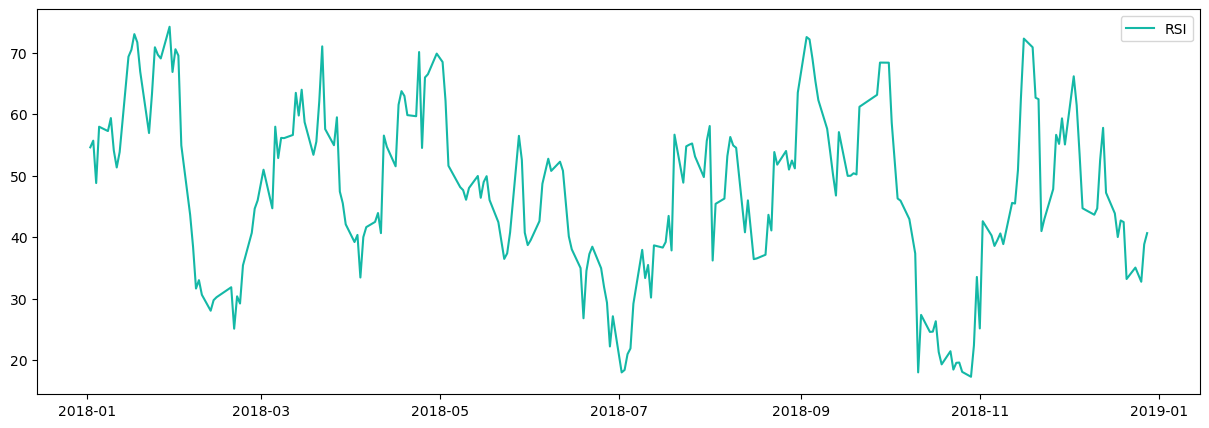

In [9]:
one_year_df = df.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]

# plt.plot(one_year_df["Close"], color=color_pal[0], label="Close")
plt.plot(one_year_df["RSI"], color=color_pal[7], label="RSI")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15, 5, forward=True)

In [10]:
import pandas as pd

EMA_12 = pd.Series(df["Close"].ewm(span=12, min_periods=12).mean())
EMA_26 = pd.Series(df["Close"].ewm(span=26, min_periods=26).mean())

df["MACD"] = pd.Series(EMA_12 - EMA_26)
df["MACD_signal"] = pd.Series(df.MACD.ewm(span=9, min_periods=9).mean())

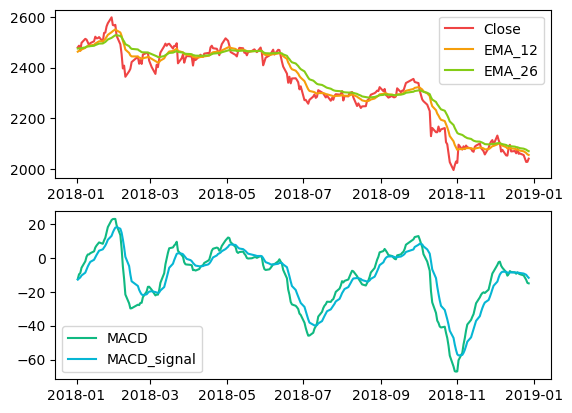

In [11]:
one_year_df = df.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]
one_year_EMA_12 = EMA_12.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]
one_year_EMA_26 = EMA_26.loc[(df.index >= "2018-01-01") & (df.index <= "2018-12-31")]

fix, axs = plt.subplots(2)

axs[0].plot(one_year_df["Close"], color=color_pal[0], label="Close")
axs[0].plot(one_year_EMA_12, color=color_pal[2], label="EMA_12")
axs[0].plot(one_year_EMA_26, color=color_pal[4], label="EMA_26")
axs[0].legend()

axs[1].plot(one_year_df["MACD"], color=color_pal[6], label="MACD")
axs[1].plot(one_year_df["MACD_signal"], color=color_pal[8], label="MACD_signal")
axs[1].legend()

fig.set_size_inches(20, 10, forward=True)

In [12]:
train_df = df.loc[df.index < "2018-01-01"].copy()
valid_df = df.loc[("2018-01-01" <= df.index) & (df.index < "2019-07-01")].copy()
test_df = df.loc[("2019-07-01" <= df.index) & (df.index < "2021-01-01")].copy()

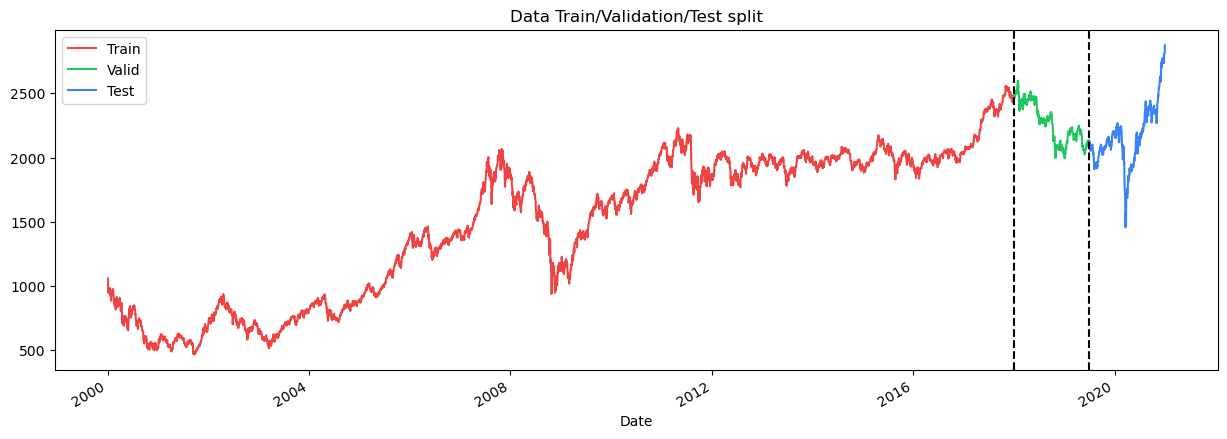

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
train_df.Close.plot(ax=ax, color=color_pal[0], label="Train", title="Data Train/Validation/Test split")
valid_df.Close.plot(ax=ax, color=color_pal[5], label="Valid")
test_df.Close.plot(ax=ax, color=color_pal[10], label="Test")
ax.axvline("2018-01-01", color="black", ls="--")
ax.axvline("2019-07-01", color="black", ls="--")
plt.legend()
plt.show()

In [14]:
y_train = train_df["Close"].copy()
X_train = train_df.drop(["Close"], axis=1)

y_valid = valid_df["Close"].copy()
X_valid = valid_df.drop(["Close"], axis=1)

y_test = test_df["Close"].copy()
X_test = test_df.drop(["Close"], axis=1)

In [15]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_valid = lgb.Dataset(X_valid, label=y_valid, reference=lgb_train)
lgb_test = lgb.Dataset(X_test, label=y_test)

In [27]:
param = {
    "force_col_wise": "true",
    "objective": "regression",
    "boosting": "gbdt",
    "learning_rate": 0.1,
    "num_leaves": 144,
    "tree_learner": "serial",
    "device_type": "cpu",
    "seed": 100,
    "max_depth": 16,
    "metric": "l2",
    "verbose": 0
}

cv_results = lgb.cv(
    param,
    lgb_train,
    1000,
    metrics="l2",
    callbacks=[
        lgb.early_stopping(30)
    ]
)

print(cv_results)

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [22]:
param = {
    "force_col_wise": "true",
    "objective": "regression",
    "boosting": "gbdt",
    "learning_rate": 0.1,
    "num_leaves": 144,
    "tree_learner": "serial",
    "device_type": "cpu",
    "seed": 100,
    "max_depth": 16,
    "metric": "l2",
    "verbose": 0
}

model = lgb.train(param, lgb_train, 1000, lgb_valid, callbacks=[lgb.early_stopping(100)])

Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [23]:
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)

print(f"MSE: {mse}, R2 Score: {r2}")

MSE: 4548.340830742441, R2 Score: 0.9203975441609957


In [25]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis=1)
final_result.columns = ['Label', 'Predict']
final_result.index = y_test.index

final_result

,Label,Predict
Date,,
2019-07-01,2129.739990,2141.829324
2019-07-02,2122.020020,2126.577475
2019-07-03,2096.020020,2107.983636
2019-07-04,2108.729980,2125.363772
2019-07-05,2110.590088,2125.061884
...,...,...
2020-12-23,2759.820068,2532.924872
2020-12-24,2806.860107,2534.496862
2020-12-28,2808.600098,2532.710425


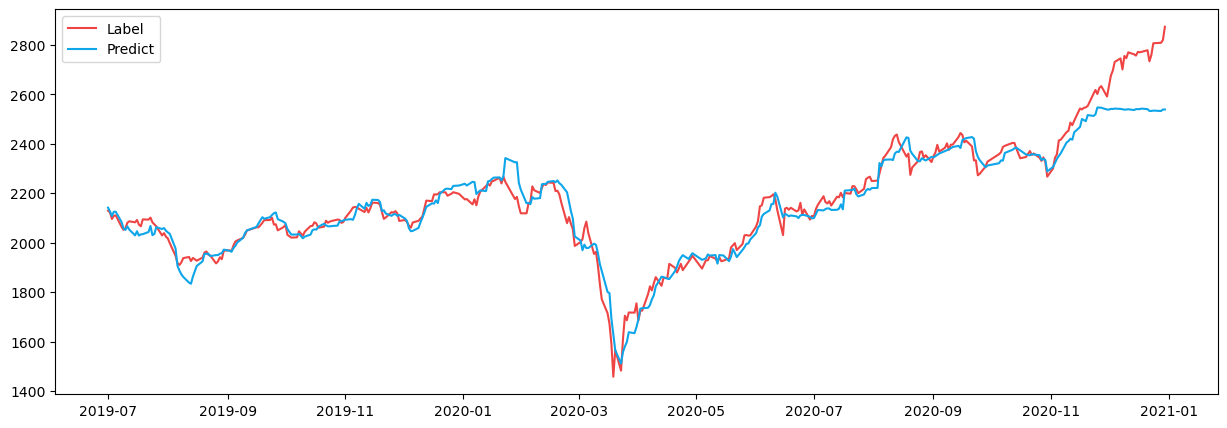

In [26]:
plt.plot(final_result["Label"], color=color_pal[0], label="Label")
plt.plot(final_result["Predict"], color=color_pal[9], label="Predict")
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15, 5, forward=True)

In [ ]:
def lgb_train(train_data, test_data, train_valid="", seed=100):
    param = {
        # Core Parameters
        
        "objective": "regression",
        "boosting": "gbdt",
        "num_iterations": 100,
        "learning_rate": 0.1,
        # "num_iterations": [100, 200, 300, 400],
        # "learning_rate": [0.01, 0.03, 0.06, 0.1],
        "num_leaves": 31,
        "tree_learner": "serial",
        "device_type": "cpu",
        "seed": seed,
        
        # Learning Control Parameters
        
        # "histogram_pool_size": -1.0,
        "max_depth": 10,
        # "max_depth": [10, 12, 14, 16],
        # "min_data_in_leaf": 20,
        # "bagging_fraction": 1.0,
        # "pos_bagging_fraction": 1.0,
        # "neg_bagging_fraction": 1.0,
        # "bagging_freq": 0,
        # "bagging_seed": 3,
        # "feature_fraction": 1.0,
        # "feature_fraction_bynode": 1.0,
        # "feature_fraction_seed": 2,
        # "extra_trees": False,
        # "extra_seed": 6,
        # "early_stopping_round": 0,
        # "first_metric_only": False,
        # "max_delta_step": 0.0,
        # "lambda_l1": 0.0,
        # "lambda_l2": 0.0,
        # "linear_lambda": 0.0,
        # "min_gain_to_split": 0.0,
        # "min_data_per_group": 100,
        # "cegb_tradeoff": 1.0,
        # "cegb_penalty_split": 0.0,
        
        # IO Parameters
        
        ## Dataset Parameter
        
        ## Predict Paameter
        
        ## Convert Parameter
        
        # Object Parameter
        
        # Metric Parameter
        
        "metric": "l2",
        
    }

    num_round = 50
    
    # model = lgb.train(param, train_data, num_round, valid_sets=valid_data, early_stopping_rounds=5)
    
    cv = lgb.cv(param, train_data, num_round, nfold=5, early_stopping_rounds=5)
    print(cv)

lgb_train(lgb_train, lgb_test)

TypeError: Training only accepts Dataset object

Use 20 years of data for training, which corresponds to about 5000 trading days(About 252 trading days a year). For each train set, use 5 years of data or 1260 trading days of data and 40 trading days for validation. 

In [ ]:
# Remove data before 2001-01-01 which is unused when training the data
df = df.loc[df.index >= "2001-01-01"]


,Open,High,Low,Close,Adj Close,Volume,EMA_9,SMA_5,SMA_10,SMA_15,SMA_20,SMA_60,RSI,MACD,MACD_signal
Date,,,,,,,,,,,,,,,
2001-01-01,504.465998,519.062024,501.104004,517.684009,517.684009,235380.0,520.344084,508.137200,513.746603,524.971071,523.486807,534.336767,37.254081,-7.210388,-6.801661
2001-01-02,503.309998,521.340027,500.970001,520.950012,520.950012,231000.0,520.078076,511.152002,511.588002,522.496673,524.284507,533.145167,29.070698,-6.308035,-6.702936
2001-01-03,512.739990,524.580017,510.700012,521.429993,521.429993,324600.0,520.165270,514.418005,510.603004,521.021339,524.484007,532.022000,33.397311,-5.490888,-6.460526
2001-01-04,551.530029,567.159973,550.909973,558.020020,558.020020,444500.0,520.291742,517.126804,511.325001,518.594003,524.661005,531.426167,61.848860,-1.869236,-5.542268
2001-01-05,559.539978,581.409973,555.400024,580.849976,580.849976,578300.0,524.064570,526.500408,515.937004,519.303338,526.373005,531.814667,67.482325,2.810736,-3.871667
